# Probability Distribution Analysis

This notebook analyzes probability distributions from LLM responses using different temperature settings.
We compare OpenAI and Claude models with varying levels of prompt rewording and sampling randomness.

In [13]:
import sys
sys.path.append('..')
import os
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from probability_estimator import get_probability_distribution
import asyncio

# Check for OpenRouter API key
openrouter_available = os.environ.get("OPENROUTER_API_KEY") is not None

print(f"OpenRouter API Key available: {openrouter_available}")

OpenRouter API Key available: True


## Configuration

Set your prompt and parameters here:

In [14]:
# User-defined prompt
USER_PROMPT = "What is the probability that Kamala Harris runs for president again?"
USER_PROMPT = "How likely is it that Nasdaq hits 7000 before Christmas 2025?"

# Number of samples to collect for each configuration
N_SAMPLES = 10

# Temperature settings to test
LOW_TEMP = 0.3
HIGH_TEMP = 0.9

print(f"Prompt: {USER_PROMPT}")
print(f"Samples per configuration: {N_SAMPLES}")
print(f"Low temperature: {LOW_TEMP}")
print(f"High temperature: {HIGH_TEMP}")

Prompt: How likely is it that Nasdaq hits 7000 before Christmas 2025?
Samples per configuration: 10
Low temperature: 0.3
High temperature: 0.9


## Collect Data from OpenAI

Generate probability distributions using OpenAI with different temperature combinations:

In [15]:
async def collect_openai_data():
    """Collect OpenAI data using OpenRouter"""
    openai_results = {}

    if openrouter_available:
        print("Collecting OpenAI data via OpenRouter...\n")
        
        # Configuration 1: Low reword temp, Low prompt temp
        print("1. Low reword temp, Low prompt temp...")
        openai_results['low_low'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=LOW_TEMP,
            prompt_temperature=LOW_TEMP,
            model="openai/gpt-4o-mini"
        )
        print(f"   Mean: {np.mean(openai_results['low_low']['probabilities']):.3f}")
        
        # Configuration 2: Low reword temp, High prompt temp
        print("2. Low reword temp, High prompt temp...")
        openai_results['low_high'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=LOW_TEMP,
            prompt_temperature=HIGH_TEMP,
            model="openai/gpt-4o-mini"
        )
        print(f"   Mean: {np.mean(openai_results['low_high']['probabilities']):.3f}")
        
        # Configuration 3: High reword temp, Low prompt temp
        print("3. High reword temp, Low prompt temp...")
        openai_results['high_low'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=HIGH_TEMP,
            prompt_temperature=LOW_TEMP,
            model="openai/gpt-4o-mini"
        )
        print(f"   Mean: {np.mean(openai_results['high_low']['probabilities']):.3f}")
        
        # Configuration 4: High reword temp, High prompt temp
        print("4. High reword temp, High prompt temp...")
        openai_results['high_high'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=HIGH_TEMP,
            prompt_temperature=HIGH_TEMP,
            model="openai/gpt-4o-mini"
        )
        print(f"   Mean: {np.mean(openai_results['high_high']['probabilities']):.3f}")
        
        print("\nOpenAI data collection complete!")
    else:
        print("OpenRouter API key not available. Skipping OpenAI data collection.")
    
    return openai_results

# Run the async function
openai_results = await collect_openai_data()


1. Low reword temp, Low prompt temp...
   Mean: 0.515
2. Low reword temp, High prompt temp...
   Mean: 0.525
3. High reword temp, Low prompt temp...
   Mean: 0.560
4. High reword temp, High prompt temp...
   Mean: 0.550

OpenAI data collection complete!


## Collect Data from Claude

Generate probability distributions using Claude with different temperature combinations:

In [16]:
async def collect_claude_data():
    """Collect Claude data using OpenRouter"""
    claude_results = {}

    if openrouter_available:
        print("Collecting Claude data via OpenRouter...\n")
        
        # Configuration 1: Low reword temp, Low prompt temp
        print("1. Low reword temp, Low prompt temp...")
        claude_results['low_low'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=LOW_TEMP,
            prompt_temperature=LOW_TEMP,
            model="anthropic/claude-sonnet-4"
        )
        print(f"   Mean: {np.mean(claude_results['low_low']['probabilities']):.3f}")
        
        # Configuration 2: Low reword temp, High prompt temp
        print("2. Low reword temp, High prompt temp...")
        claude_results['low_high'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=LOW_TEMP,
            prompt_temperature=HIGH_TEMP,
            model="anthropic/claude-sonnet-4"
        )
        print(f"   Mean: {np.mean(claude_results['low_high']['probabilities']):.3f}")
        
        # Configuration 3: High reword temp, Low prompt temp
        print("3. High reword temp, Low prompt temp...")
        claude_results['high_low'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=HIGH_TEMP,
            prompt_temperature=LOW_TEMP,
            model="anthropic/claude-sonnet-4"
        )
        print(f"   Mean: {np.mean(claude_results['high_low']['probabilities']):.3f}")
        
        # Configuration 4: High reword temp, High prompt temp
        print("4. High reword temp, High prompt temp...")
        claude_results['high_high'] = await get_probability_distribution(
            prompt=USER_PROMPT,
            n_samples=N_SAMPLES,
            reword_temperature=HIGH_TEMP,
            prompt_temperature=HIGH_TEMP,
            model="anthropic/claude-sonnet-4"
        )
        print(f"   Mean: {np.mean(claude_results['high_high']['probabilities']):.3f}")
        
        print("\nClaude data collection complete!")
    else:
        print("OpenRouter API key not available. Skipping Claude data collection.")
    
    return claude_results

# Run the async function
claude_results = await collect_claude_data()


1. Low reword temp, Low prompt temp...
   Mean: 0.510
2. Low reword temp, High prompt temp...
   Mean: 0.525
3. High reword temp, Low prompt temp...
   Mean: 0.610
4. High reword temp, High prompt temp...
   Mean: 0.580

Claude data collection complete!


## Visualize OpenAI Results

Create histograms showing the distribution of probabilities for each temperature configuration:

In [17]:
if openrouter_available and openai_results:
    # Create subplots: 2x2 grid with larger size and better spacing
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f'Low Reword ({LOW_TEMP}), Low Prompt ({LOW_TEMP})',
            f'Low Reword ({LOW_TEMP}), High Prompt ({HIGH_TEMP})',
            f'High Reword ({HIGH_TEMP}), Low Prompt ({LOW_TEMP})',
            f'High Reword ({HIGH_TEMP}), High Prompt ({HIGH_TEMP})'
        ),
        vertical_spacing=0.15,
        horizontal_spacing=0.12
    )
    
    configs = [
        ('low_low', 1, 1),
        ('low_high', 1, 2),
        ('high_low', 2, 1),
        ('high_high', 2, 2)
    ]
    
    for config_name, row, col in configs:
        probs = openai_results[config_name]['probabilities']
        
        fig.add_trace(
            go.Histogram(
                x=probs,
                nbinsx=15,
                name=config_name,
                marker_color='steelblue',
                showlegend=False,
                hovertemplate='Probability: %{x:.2%}<br>Count: %{y}<extra></extra>'
            ),
            row=row, col=col
        )
        
        # Add mean line
        mean_val = np.mean(probs)
        fig.add_vline(
            x=mean_val,
            line_dash="dash",
            line_color="red",
            annotation_text=f"Mean: {mean_val:.2%}",
            annotation_position="top",
            annotation_font_size=14,
            row=row, col=col
        )
    
    # Update axes with larger fonts
    fig.update_xaxes(title_text="Probability", range=[0, 1], title_font_size=16, tickfont_size=14)
    fig.update_yaxes(title_text="Count", title_font_size=16, tickfont_size=14)
    
    # Update layout with larger figure and fonts
    fig.update_layout(
        title_text=f"OpenAI Probability Distributions (via OpenRouter)<br><sub>{USER_PROMPT}</sub>",
        title_font_size=20,
        height=1000,  # Increased from 700
        width=1400,   # Added width
        showlegend=False,
        font=dict(size=14)
    )
    
    # Update subplot titles font size
    for annotation in fig['layout']['annotations']:
        annotation['font'] = dict(size=16)
    
    fig.show()
else:
    print("No OpenAI data to visualize.")

## Visualize Claude Results

Create histograms showing the distribution of probabilities for each temperature configuration:

In [18]:
if openrouter_available and claude_results:
    # Create subplots: 2x2 grid with larger size and better spacing
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f'Low Reword ({LOW_TEMP}), Low Prompt ({LOW_TEMP})',
            f'Low Reword ({LOW_TEMP}), High Prompt ({HIGH_TEMP})',
            f'High Reword ({HIGH_TEMP}), Low Prompt ({LOW_TEMP})',
            f'High Reword ({HIGH_TEMP}), High Prompt ({HIGH_TEMP})'
        ),
        vertical_spacing=0.15,
        horizontal_spacing=0.12
    )
    
    configs = [
        ('low_low', 1, 1),
        ('low_high', 1, 2),
        ('high_low', 2, 1),
        ('high_high', 2, 2)
    ]
    
    for config_name, row, col in configs:
        probs = claude_results[config_name]['probabilities']
        
        fig.add_trace(
            go.Histogram(
                x=probs,
                nbinsx=15,
                name=config_name,
                marker_color='coral',
                showlegend=False,
                hovertemplate='Probability: %{x:.2%}<br>Count: %{y}<extra></extra>'
            ),
            row=row, col=col
        )
        
        # Add mean line
        mean_val = np.mean(probs)
        fig.add_vline(
            x=mean_val,
            line_dash="dash",
            line_color="darkred",
            annotation_text=f"Mean: {mean_val:.2%}",
            annotation_position="top",
            annotation_font_size=14,
            row=row, col=col
        )
    
    # Update axes with larger fonts
    fig.update_xaxes(title_text="Probability", range=[0, 1], title_font_size=16, tickfont_size=14)
    fig.update_yaxes(title_text="Count", title_font_size=16, tickfont_size=14)
    
    # Update layout with larger figure and fonts
    fig.update_layout(
        title_text=f"Claude Probability Distributions (via OpenRouter)<br><sub>{USER_PROMPT}</sub>",
        title_font_size=20,
        height=1000,  # Increased from 700
        width=1400,   # Added width
        showlegend=False,
        font=dict(size=14)
    )
    
    # Update subplot titles font size
    for annotation in fig['layout']['annotations']:
        annotation['font'] = dict(size=16)
    
    fig.show()
else:
    print("No Claude data to visualize.")

## Statistical Summary

Compare the statistics across all configurations:

In [19]:
import pandas as pd

summary_data = []

# OpenAI summaries
if openrouter_available and openai_results:
    for config_name, result in openai_results.items():
        probs = np.array(result['probabilities'])
        summary_data.append({
            'Provider': 'OpenAI (via OpenRouter)',
            'Model': result['model'],
            'Configuration': config_name.replace('_', ' ').title(),
            'Reword Temp': result['reword_temperature'],
            'Prompt Temp': result['prompt_temperature'],
            'Mean': f"{probs.mean():.3f}",
            'Std Dev': f"{probs.std():.3f}",
            'Min': f"{probs.min():.3f}",
            'Max': f"{probs.max():.3f}",
            'Median': f"{np.median(probs):.3f}"
        })

# Claude summaries
if openrouter_available and claude_results:
    for config_name, result in claude_results.items():
        probs = np.array(result['probabilities'])
        summary_data.append({
            'Provider': 'Claude (via OpenRouter)',
            'Model': result['model'],
            'Configuration': config_name.replace('_', ' ').title(),
            'Reword Temp': result['reword_temperature'],
            'Prompt Temp': result['prompt_temperature'],
            'Mean': f"{probs.mean():.3f}",
            'Std Dev': f"{probs.std():.3f}",
            'Min': f"{probs.min():.3f}",
            'Max': f"{probs.max():.3f}",
            'Median': f"{np.median(probs):.3f}"
        })

if summary_data:
    df = pd.DataFrame(summary_data)
    print(f"\nStatistical Summary for: {USER_PROMPT}")
    print("="*100)
    print(df.to_string(index=False))
else:
    print("No data available for summary.")


Statistical Summary for: How likely is it that Nasdaq hits 7000 before Christmas 2025?
               Provider                     Model Configuration  Reword Temp  Prompt Temp  Mean Std Dev   Min   Max Median
OpenAI (via OpenRouter)        openai/gpt-4o-mini       Low Low          0.3          0.3 0.515   0.118 0.300 0.650  0.600
OpenAI (via OpenRouter)        openai/gpt-4o-mini      Low High          0.3          0.9 0.525   0.103 0.400 0.650  0.600
OpenAI (via OpenRouter)        openai/gpt-4o-mini      High Low          0.9          0.3 0.560   0.109 0.300 0.650  0.600
OpenAI (via OpenRouter)        openai/gpt-4o-mini     High High          0.9          0.9 0.550   0.100 0.400 0.650  0.600
Claude (via OpenRouter) anthropic/claude-sonnet-4       Low Low          0.3          0.3 0.510   0.159 0.150 0.700  0.550
Claude (via OpenRouter) anthropic/claude-sonnet-4      Low High          0.3          0.9 0.525   0.163 0.150 0.700  0.550
Claude (via OpenRouter) anthropic/claude-sonnet-4  

## View Sample Reworded Prompts

Examine how the prompts were reworded at different temperatures:

In [20]:
def show_reworded_prompts(results_dict, provider_name):
    print(f"\n{'='*80}")
    print(f"{provider_name} - Sample Reworded Prompts")
    print(f"{'='*80}\n")
    
    for config_name, result in results_dict.items():
        print(f"Configuration: {config_name.replace('_', ' ').title()}")
        print(f"Reword Temp: {result['reword_temperature']}, Prompt Temp: {result['prompt_temperature']}")
        print(f"{'-'*80}")
        
        # Show first 3 reworded prompts
        for i, prompt in enumerate(result['reworded_prompts'][:3], 1):
            prob = result['probabilities'][i-1]
            print(f"{i}. {prompt}")
            print(f"   → Probability: {prob:.2%}")
        print()

if openai_results:
    show_reworded_prompts(openai_results, "OpenAI")

if claude_results:
    show_reworded_prompts(claude_results, "Claude")


OpenAI - Sample Reworded Prompts

Configuration: Low Low
Reword Temp: 0.3, Prompt Temp: 0.3
--------------------------------------------------------------------------------
1. How likely is it that Nasdaq hits 7000 before Christmas 2025?
   → Probability: 60.00%
2. What are the chances of the Nasdaq reaching 7000 before Christmas 2025?
   → Probability: 60.00%
3. What are the chances that the Nasdaq will reach 7000 prior to Christmas in 2025?
   → Probability: 60.00%

Configuration: Low High
Reword Temp: 0.3, Prompt Temp: 0.9
--------------------------------------------------------------------------------
1. How likely is it that Nasdaq hits 7000 before Christmas 2025?
   → Probability: 60.00%
2. What are the chances that the Nasdaq will reach 7000 prior to Christmas 2025?
   → Probability: 60.00%
3. What are the chances that the Nasdaq will reach 7000 before Christmas 2025?
   → Probability: 60.00%

Configuration: High Low
Reword Temp: 0.9, Prompt Temp: 0.3
--------------------------

## Side-by-Side Comparison

Compare OpenAI and Claude directly for the same configuration:

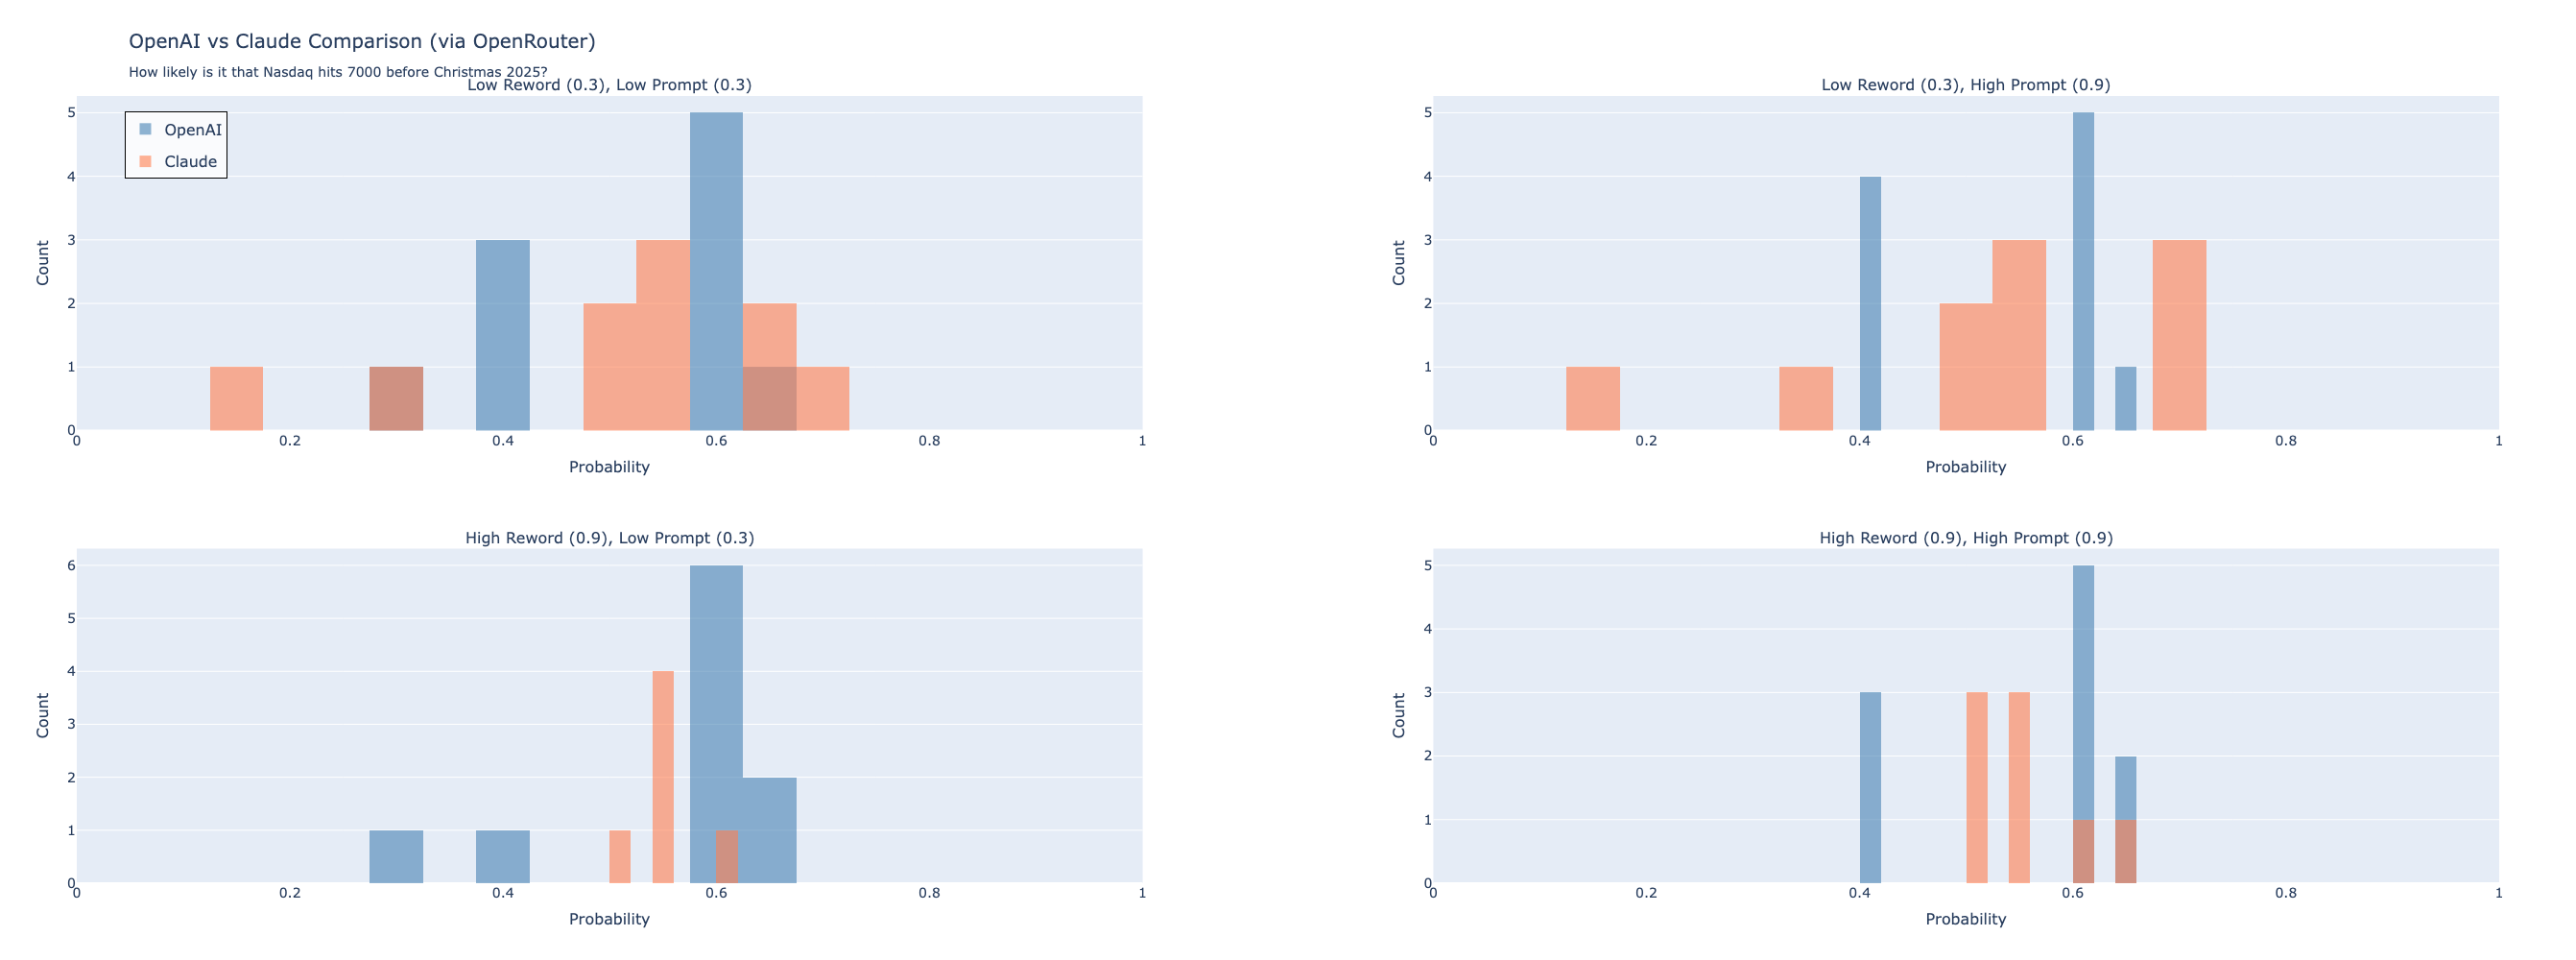

In [22]:
if openrouter_available and openai_results and claude_results:
    # Create comparison plot for all 4 configurations with larger size
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f'Low Reword ({LOW_TEMP}), Low Prompt ({LOW_TEMP})',
            f'Low Reword ({LOW_TEMP}), High Prompt ({HIGH_TEMP})',
            f'High Reword ({HIGH_TEMP}), Low Prompt ({LOW_TEMP})',
            f'High Reword ({HIGH_TEMP}), High Prompt ({HIGH_TEMP})'
        ),
        vertical_spacing=0.15,
        horizontal_spacing=0.12
    )
    
    configs = [
        ('low_low', 1, 1),
        ('low_high', 1, 2),
        ('high_low', 2, 1),
        ('high_high', 2, 2)
    ]
    
    for config_name, row, col in configs:
        # OpenAI
        fig.add_trace(
            go.Histogram(
                x=openai_results[config_name]['probabilities'],
                nbinsx=15,
                name='OpenAI',
                marker_color='steelblue',
                opacity=0.6,
                showlegend=(row==1 and col==1),
                legendgroup='openai',
                hovertemplate='OpenAI<br>Probability: %{x:.2%}<br>Count: %{y}<extra></extra>'
            ),
            row=row, col=col
        )
        
        # Claude
        fig.add_trace(
            go.Histogram(
                x=claude_results[config_name]['probabilities'],
                nbinsx=15,
                name='Claude',
                marker_color='coral',
                opacity=0.6,
                showlegend=(row==1 and col==1),
                legendgroup='claude',
                hovertemplate='Claude<br>Probability: %{x:.2%}<br>Count: %{y}<extra></extra>'
            ),
            row=row, col=col
        )
    
    # Update axes with larger fonts
    fig.update_xaxes(title_text="Probability", range=[0, 1], title_font_size=16, tickfont_size=14)
    fig.update_yaxes(title_text="Count", title_font_size=16, tickfont_size=14)
    
    # Update layout with larger figure and fonts
    fig.update_layout(
        title_text=f"OpenAI vs Claude Comparison (via OpenRouter)<br><sub>{USER_PROMPT}</sub>",
        title_font_size=20,
        height=1000,  # Increased from 700
        width=1400,   # Added width
        barmode='overlay',
        font=dict(size=14),
        legend=dict(
            font=dict(size=16),
            x=0.02,
            y=0.98,
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor='black',
            borderwidth=1
        )
    )
    
    # Update subplot titles font size
    for annotation in fig['layout']['annotations']:
        annotation['font'] = dict(size=16)
    
    fig.show()
else:
    print("Both OpenAI and Claude data required for comparison.")

## Analysis Insights

Key observations:

1. **Reword Temperature**: Controls how much the prompt is varied
   - Low (0.3): Minimal rewording, similar phrasing
   - High (0.9): Significant rewording, diverse phrasing

2. **Prompt Temperature**: Controls randomness in LLM responses
   - Low (0.3): More deterministic, tighter distribution
   - High (0.9): More random, wider distribution

3. **Expected Patterns**:
   - Low/Low: Narrow distribution (consistent prompt + deterministic responses)
   - High/High: Wide distribution (varied prompts + random responses)
   - Low/High or High/Low: Medium spread